<a href="https://colab.research.google.com/github/edcalderin/LLM_Tech/blob/master/Pytorch_Introduction_Enter_NonLinear_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Introduction — Enter NonLinear Functions

https://medium.com/data-science/pytorch-introduction-enter-nonlinear-functions-4dd893845592

## Downloading data from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

print("Path to dataset files:", path)

100%|██████████| 3.97k/3.97k [00:00<00:00, 476kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/heart-failure-clinical-data/versions/1


In [ ]:
!ls $path

heart_failure_clinical_records_dataset.csv


In [2]:
import pandas as pd

data = pd.read_csv(f"{path}/heart_failure_clinical_records_dataset.csv")

data.head()
print(data.shape)

(299, 13)


## Preprocessing data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

print(type(X_train))

<class 'torch.Tensor'>


## Training a Vanilla Linear Network

In [49]:
from torch import nn

class LinearModel(nn.Module):

    def __init__(self):
        super().__init__()
        """self.__layer_1 = nn.Linear(12, 20)
        self.__layer_2 = nn.Linear(20, 20)
        self.__layer_3 = nn.Linear(20, 1)
        """
        self.__layer_1 = nn.Linear(12, 5)
        self.__relu = nn.ReLU()
        self.__layer_2 = nn.Linear(5, 1)

    def forward(self, x):
        """
        x = self.__layer_1(x)
        x = self.__layer_2(x)
        return self.__layer_3(x)
        """
        x = self.__layer_1(x)
        x = self.__relu(x)
        return self.__layer_2(x)

Definint Loss function

In [50]:
from torch.optim import SGD

loss_fn = nn.BCEWithLogitsLoss()

model_0 = LinearModel()

optimizer = SGD(params=model_0.parameters(), lr=0.01)

In [51]:
def compute_accuracy(y_true, y_pred)->float:
    tp_tn = torch.eq(y_true, y_pred).sum().item()
    return (tp_tn / len(y_pred))*100

Training the model

In [52]:
torch.manual_seed(42)

EPOCHS: int = 1500
train_acc_values, test_acc_values =  [], []

for epoch in range(EPOCHS):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    loss = loss_fn(y_logits, y_train)
    acc: float = compute_accuracy(y_train, torch.round(torch.sigmoid(y_logits)))
    train_acc_values.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_acc: float = compute_accuracy(y_test, torch.round(torch.sigmoid(test_logits)))
        test_acc_values.append(test_acc)

    if epoch%100==0:
        print(f"Epoch: {epoch:<3} | Loss: {loss:.5f} | Train Acc: {acc:.2f}% | Test Acc: {test_acc:.2f}%")

Epoch: 0   | Loss: 0.75148 | Train Acc: 33.97% | Test Acc: 32.22%
Epoch: 100 | Loss: 0.67467 | Train Acc: 55.50% | Test Acc: 66.67%
Epoch: 200 | Loss: 0.62038 | Train Acc: 65.07% | Test Acc: 72.22%
Epoch: 300 | Loss: 0.57926 | Train Acc: 67.94% | Test Acc: 71.11%
Epoch: 400 | Loss: 0.54595 | Train Acc: 68.90% | Test Acc: 66.67%
Epoch: 500 | Loss: 0.51814 | Train Acc: 70.33% | Test Acc: 67.78%
Epoch: 600 | Loss: 0.49482 | Train Acc: 72.73% | Test Acc: 68.89%
Epoch: 700 | Loss: 0.47555 | Train Acc: 73.21% | Test Acc: 71.11%
Epoch: 800 | Loss: 0.45952 | Train Acc: 72.25% | Test Acc: 72.22%
Epoch: 900 | Loss: 0.44603 | Train Acc: 73.21% | Test Acc: 74.44%
Epoch: 1000 | Loss: 0.43436 | Train Acc: 77.03% | Test Acc: 77.78%
Epoch: 1100 | Loss: 0.42445 | Train Acc: 79.90% | Test Acc: 80.00%
Epoch: 1200 | Loss: 0.41583 | Train Acc: 81.34% | Test Acc: 77.78%
Epoch: 1300 | Loss: 0.40815 | Train Acc: 83.25% | Test Acc: 80.00%
Epoch: 1400 | Loss: 0.40119 | Train Acc: 83.73% | Test Acc: 80.00%


<Axes: >

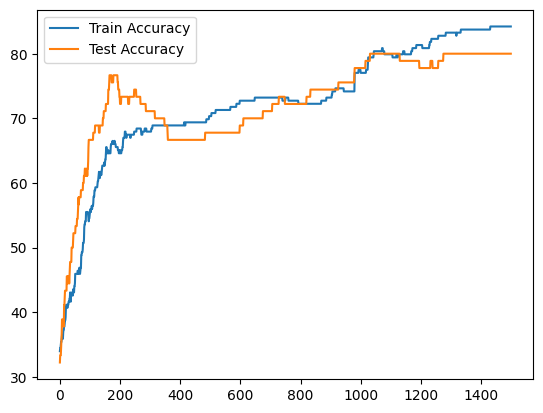

In [53]:
import seaborn as sns

sns.lineplot(x=range(EPOCHS), y=train_acc_values, label="Train Accuracy")
sns.lineplot(x=range(EPOCHS), y=test_acc_values, label="Test Accuracy")

By adding No-linear activation functions the model does not exhibit overfitting